# Customer churn 📱

**Описание проекта**\
Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Требуется обучить на этих данных модель для прогноза оттока клиентов.

**Описание данных**\
Данные состоят из нескольких таблиц:

- `contract` — информация о договоре;
- `personal` — персональные данные клиента;
- `internet` — информация об интернет-услугах;
- `phone` — информация об услугах телефонии.

**Целевая метрика**\
`ROC_AUC >= 0.85`

**Содержание**<a id='toc0_'></a>    
1. [Подготовка         ](#toc1_)    
1.1. [Библиотеки         ](#toc1_1_)    
1.2. [Конфигурация         ](#toc1_2_)    
1.3. [Сервисные функции         ](#toc1_3_)    
2. [Подключение к БД ](#toc2_)    
3. [Датасет `contract`         ](#toc3_)    
3.1. [Загрузка         ](#toc3_1_)    
3.2. [Переименование признаков         ](#toc3_2_)    
3.3. [Проверка типов данных         ](#toc3_3_)    
3.4. [Проверка полных дубликатов         ](#toc3_4_)    
3.5. [Проверка пропусков         ](#toc3_5_)    
3.6. [Изучение признаков         ](#toc3_6_)    
3.6.1. [Описание         ](#toc3_6_1_)    
3.6.2. [Признак `customer_id`         ](#toc3_6_2_)    
3.6.3. [Признак `begin_date`         ](#toc3_6_3_)    
3.6.4. [Признак `end_date`         ](#toc3_6_4_)    
3.6.5. [Признак `type`         ](#toc3_6_5_)    
3.6.6. [Признак `paperless_billing`         ](#toc3_6_6_)    
3.6.7. [Признак `payment_method`         ](#toc3_6_7_)    
3.6.8. [Признак `monthly_charges`         ](#toc3_6_8_)    
3.6.9. [Признак `total_charges`         ](#toc3_6_9_)    
3.7. [Выводы по датасету         ](#toc3_7_)    
4. [Датасет `personal_new.csv`         ](#toc4_)    
4.1. [Загрузка         ](#toc4_1_)    
4.2. [Переименование признаков         ](#toc4_2_)    
4.3. [Проверка типов данных         ](#toc4_3_)    
4.4. [Проверка полных дубликатов         ](#toc4_4_)    
4.5. [Проверка пропусков         ](#toc4_5_)    
4.6. [Изучение признаков         ](#toc4_6_)    
4.6.1. [Описание         ](#toc4_6_1_)    
4.6.2. [Признак `customer_id`         ](#toc4_6_2_)    
4.6.3. [Признак `gender`         ](#toc4_6_3_)    
4.6.4. [Признак `senior_citizen`         ](#toc4_6_4_)    
4.6.5. [Признак `partner`         ](#toc4_6_5_)    
4.6.6. [Признак `dependents`         ](#toc4_6_6_)    
4.7. [Выводы по датасету         ](#toc4_7_)    
5. [Датасет `internet_new.csv`         ](#toc5_)    
5.1. [Загрузка         ](#toc5_1_)    
5.2. [Переименование признаков         ](#toc5_2_)    
5.3. [Проверка типов данных         ](#toc5_3_)    
5.4. [Проверка полных дубликатов         ](#toc5_4_)    
5.5. [Проверка пропусков         ](#toc5_5_)    
5.6. [Изучение признаков         ](#toc5_6_)    
5.6.1. [Описание      ](#toc5_6_1_)    
5.6.2. [Признак `customer_id`      ](#toc5_6_2_)    
5.6.3. [Признак `internet_service`      ](#toc5_6_3_)    
5.6.4. [Все остальные признаки      ](#toc5_6_4_)    
5.7. [Выводы по датасету         ](#toc5_7_)    
6. [Датасет `phone_new.csv`         ](#toc6_)    
6.1. [Загрузка         ](#toc6_1_)    
6.2. [Переименование признаков         ](#toc6_2_)    
6.3. [Проверка типов данных         ](#toc6_3_)    
6.4. [Проверка полных дубликатов         ](#toc6_4_)    
6.5. [Проверка пропусков         ](#toc6_5_)    
6.6. [Изучение признаков         ](#toc6_6_)    
6.6.1. [Описание         ](#toc6_6_1_)    
6.6.2. [Признак `customer_id`         ](#toc6_6_2_)    
6.6.3. [Признак `multiple_lines`         ](#toc6_6_3_)    
6.7. [Выводы по датасету         ](#toc6_7_)    
7. [Объединение таблиц         ](#toc7_)    
7.1. [Объединение      ](#toc7_1_)    
7.2. [Проверка типов данных      ](#toc7_2_)    
7.3. [Проверка полных дубликатов      ](#toc7_3_)    
7.4. [Проверка пропусков      ](#toc7_4_)    
8. [Выделение таргета      ](#toc8_)    
9. [Корреляция     ](#toc9_)    
10. [Разделение данных      ](#toc10_)    
11. [Модели      ](#toc11_)    
11.1. [Подготовка    ](#toc11_1_)    
11.2. [Модель `LogisticRegression`    ](#toc11_2_)    
11.3. [Модель `LinearSVC`    ](#toc11_3_)    
11.4. [Модель `RandomForestClassifier`    ](#toc11_4_)    
11.5. [Модель `LGBMClassifier`    ](#toc11_5_)    
11.6. [Модель `CatBoostClassifier`    ](#toc11_6_)    
11.7. [Нейронная сеть](#toc11_7_)    
12. [Результаты     ](#toc12_)    
12.1. [Результаты на трейне     ](#toc12_1_)    
12.2. [Результаты на тесте     ](#toc12_2_)    
12.3. [Важность признаков     ](#toc12_3_)    
13. [Итоговый вывод         ](#toc13_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Подготовка          [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Библиотеки          [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
%pip install -q catboost==1.2.7
%pip install -q hyperopt==0.2.7
%pip install -q lightgbm==4.5.0
%pip install -q matplotlib==3.9.2
%pip install -q numpy==1.26.4
%pip install -q pandas==2.2.3
%pip install -q phik==0.12.4
%pip install -q prettytable==3.12.0
%pip install -q scikit-learn==1.5.2
%pip install -q seaborn==0.13.2
%pip install -q shap==0.46.0
%pip install -q statsmodels==0.14.4
%pip install -q termcolor==2.5.0
%pip install -q torch==2.6.0

clear_output()

In [3]:
import os
import re
import urllib
from os.path import exists


import sqlite3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# NN
import torch
from torch import nn
from torch.utils.data import (Dataset,
                              DataLoader)

# Hyperparams tuning
from hyperopt import (hp,
                      fmin,
                      tpe,
                      Trials,
                      STATUS_OK,
                      STATUS_FAIL)

from sklearn.base import (BaseEstimator,
                          TransformerMixin)
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder)
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)
from sklearn.metrics import (ConfusionMatrixDisplay,
                             classification_report,
                             roc_auc_score,
                             accuracy_score,
                             recall_score)

from termcolor import colored
from prettytable import PrettyTable
from phik import phik_matrix  # this import IS accessed
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

/Users/rivel/anaconda3/envs/true12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.2. <a id='toc1_2_'></a>Конфигурация          [&#8593;](#toc0_)

In [4]:
RANDOM_STATE = 210425
TEST_SIZE = 0.25

In [5]:
pd.options.display.max_columns = 50

In [6]:
# без этого ядро всегда падало
os.environ["OMP_NUM_THREADS"] = "1"            # оставить 1 поток
torch.backends.mkldnn.enabled = False          # <‑‑ главное!
torch.set_num_threads(1)

### 1.3. <a id='toc1_3_'></a>Сервисные функции          [&#8593;](#toc0_)

In [7]:
def camel_to_snake(camel_str):
    snake_str = re.sub(r'(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])', '_', camel_str).lower()
    return snake_str

In [8]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    """Function optimizes memory usage in dataframe

    Args:
        df (pd.DataFrame): DataFrame to optimize.
        print_size (bool, optional): Display of optimization results. Defaults to True.

    Returns:
        pd.DataFrame: Optimized DataFrame
    """

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)

    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024 ** 2
    if print_size:
        print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                            .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

In [9]:
def check_duplicates(df: pd.DataFrame) -> None:
    duplicates_count = df.duplicated().sum()

    if duplicates_count == 0:
        print(colored('Полных дубликатов не обнаружено.', 'green'))
        return

    duplicates_part = duplicates_count / len(df)
    print(colored(f'Обнаружено {duplicates_count} дубликатов ({duplicates_part:.2%})', 'red'))

In [10]:
def check_nans(df: pd.DataFrame) -> None:
    if df.isna().sum().sum() == 0:
        print(colored('Пропусков не обнаружено.', 'green'))
        return

    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']

    missing_info = df.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(df):.2%})'
        table.add_row([col, colored(s, color)])

    print(table)

In [11]:
def get_info_about_nan_in_series(series: pd.Series) -> None:
    nan_cnt = series.isna().sum()
    text = colored('No missing values', 'green') if nan_cnt == 0 \
        else colored(f'{nan_cnt} ({nan_cnt / len(series):.2%})', 'red')
    print(text)

In [12]:
def get_value_counts(series: pd.Series) -> None:
    data = pd.DataFrame()
    data['count'] = series.value_counts()
    data['part'] = data['count'] / len(series)
    display(data)

In [13]:
def draw_plots_about_column(df: pd.DataFrame,
                            column: str,
                            column_description: str = None,
                            bins: int = 20
                            ) -> None:
    if column_description is None:
        column_description = column

    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    sns.violinplot(df, x=column, ax=ax1, orient='h')
    ax1.set_xlabel(column_description)
    ax1.grid()

    sns.boxplot(df, x=column, ax=ax2)
    ax2.set_xlabel(column_description)
    ax2.grid()

    sns.histplot(df, x=column, bins=bins, ax=ax3)
    ax3.set_xlabel(column_description)
    ax3.grid()
    ax3.set_ylabel('Количество')

    ax4.set_visible(False)

    plt.suptitle(f'Информация о колонке `{column_description}`', fontsize=18)
    plt.tight_layout()

    plt.show()

In [14]:
def check_phik_correlation(df: pd.DataFrame, interval_cols: list[str]) -> None:
    plt.figure(figsize=(10, 5))
    correlation_matrix = df.phik_matrix(interval_cols=interval_cols)
    mask = np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool)
    lower_triangle = correlation_matrix.where(mask)
    sns.heatmap(lower_triangle,
                cmap='Greens',
                annot=True,
                fmt='.2f');

    plt.title(r'$phi_k$ корреляция между всеми признаками', fontsize=18)
    plt.tight_layout()
    plt.show()

In [15]:
def check_vif_values(df: pd.DataFrame) -> None:
    df = df.select_dtypes(include='number')

    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    with_constants = add_constant(df)

    vif_data = pd.DataFrame()
    vif_data['variable'] = with_constants.columns
    vif_data['vif'] = [variance_inflation_factor(with_constants.values, i) for i in range(with_constants.shape[1])]

    res = vif_data.sort_values(by='vif', ascending=False).reset_index(drop=True)
    display(res)

## 2. <a id='toc2_'></a>Подключение к БД  [&#8593;](#toc0_)

In [16]:
if not exists('ds-plus-final.db'):
    url = 'https://code.s3.yandex.net/data-scientist/ds-plus-final.db'
    urllib.request.urlretrieve(url, 'ds-plus-final.db')

In [17]:
con = sqlite3.connect('ds-plus-final.db')

## 3. <a id='toc3_'></a>Датасет `contract`          [&#8593;](#toc0_)

### 3.1. <a id='toc3_1_'></a>Загрузка          [&#8593;](#toc0_)

In [18]:
contract = pd.read_sql('SELECT * FROM contract', con)
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7,353.5


### 3.2. <a id='toc3_2_'></a>Переименование признаков          [&#8593;](#toc0_)

Видим, что названия столбцов не соответствуют PEP8. Приведем их к snake_case.

In [19]:
contract.columns = [camel_to_snake(c) for c in contract.columns]

In [20]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

### 3.3. <a id='toc3_3_'></a>Проверка типов данных          [&#8593;](#toc0_)

In [21]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        7043 non-null   object
 1   begin_date         7043 non-null   object
 2   end_date           7043 non-null   object
 3   type               7043 non-null   object
 4   paperless_billing  7043 non-null   object
 5   payment_method     7043 non-null   object
 6   monthly_charges    7043 non-null   object
 7   total_charges      7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB


Все признаки по умолчанию имеют тип `object`. Приведем их к нужным типам.

In [22]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'])
contract['monthly_charges'] = pd.to_numeric(contract['monthly_charges'])

Столбец `total_charges` не может быть приведен. Изучим это дополнительно.

In [23]:
mask = contract['total_charges'].str.match(r'\d*\.\d*')
contract[~mask]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Видим, что все записи имеют начало контракта `2020-02-01`. Именно на эту дату актуальны датасеты. Значит по этим контрактам еще не было ни одного платежа, так как они только начались. Заполним данные значения `0`.

In [24]:
contract.loc[~mask, 'total_charges'] = 0

Теперь можно установить корректный тип данных.

In [25]:
contract['total_charges'] = pd.to_numeric(contract['total_charges'])

Проверим еще раз все типы данных.

In [26]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


### 3.4. <a id='toc3_4_'></a>Проверка полных дубликатов          [&#8593;](#toc0_)

In [27]:
check_duplicates(contract)

Полных дубликатов не обнаружено.


### 3.5. <a id='toc3_5_'></a>Проверка пропусков          [&#8593;](#toc0_)

In [28]:
check_nans(contract)

Пропусков не обнаружено.


### 3.6. <a id='toc3_6_'></a>Изучение признаков          [&#8593;](#toc0_)

#### 3.6.1. <a id='toc3_6_1_'></a>Описание          [&#8593;](#toc0_)

|    Признак         | Описание                                     |
|:------------------:|----------------------------------------------|
| customer_id        | идентификатор абонента                       |
| begin_date         | дата начала действия договора                |
| end_date           | дата окончания действия договора             |
| type               | тип оплаты: раз в год-два или ежемесячно     |
| paperless_billing  | электронный расчётный лист                   |
| payment_method     | тип платежа                                  |
| monthly_charges    | расходы за месяц                             |
| total_charges      | общие расходы абонента                       |

#### 3.6.2. <a id='toc3_6_2_'></a>Признак `customer_id`          [&#8593;](#toc0_)

In [29]:
contract['customer_id'].nunique(), len(contract)

(7043, 7043)

Все id уникальны и будут использованы при объединении таблиц.

#### 3.6.3. <a id='toc3_6_3_'></a>Признак `begin_date`          [&#8593;](#toc0_)

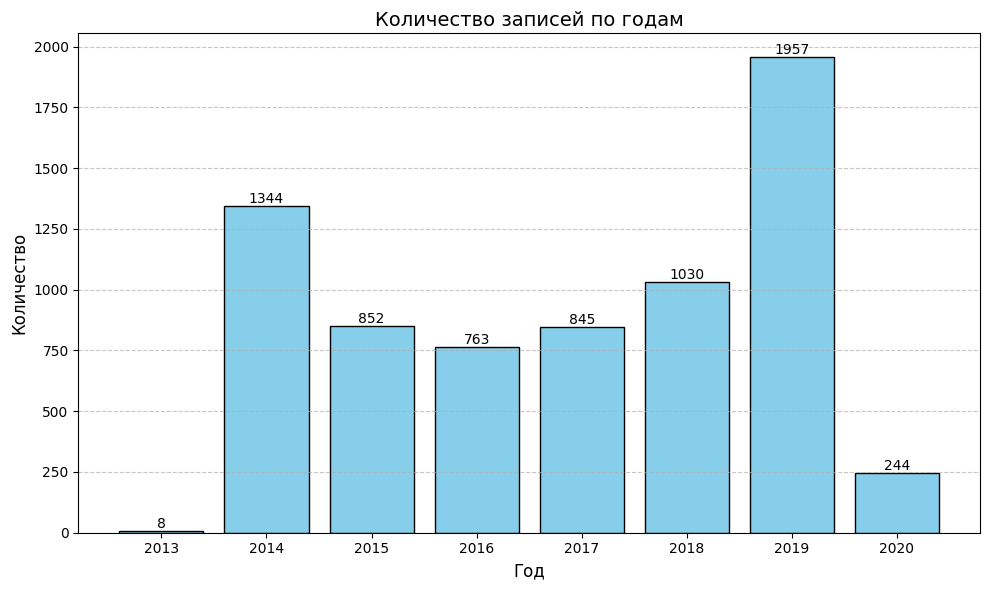

In [30]:
begin_date_year = contract['begin_date'].dt.year
year_counts = begin_date_year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.1, str(int(height)),
             ha='center',
             va='bottom',
             fontsize=10)

plt.title('Количество записей по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(year_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Малое количество записей в 2020 объясняется тем, что за этот год данные представлены только за первый месяц. В остальном данные выглядят адекватно.

#### 3.6.4. <a id='toc3_6_4_'></a>Признак `end_date`          [&#8593;](#toc0_)

In [31]:
get_value_counts(contract['end_date'])

,count,part
end_date,,
No,5942,0.843675
2020-01-01,39,0.005537
2019-12-01,38,0.005395
2018-11-01,35,0.004969
2019-09-01,32,0.004544
...,...,...
2014-09-01,2,0.000284
2014-12-01,2,0.000284
2014-06-01,1,0.000142


Как мы видим `84%` контрактов не имеют даты окончания, что представлено значением `No`.

Посмотрим сколько дней обычно длится контракт.

In [32]:
mask = contract['end_date'] != 'No'
with_end_date = contract[mask]
with_end_date.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35
15,3655-SNQYZ,2014-05-01,2016-03-01,Two year,No,Credit card (automatic),113.25,2491.50
25,6865-JZNKO,2017-08-01,2018-09-01,Month-to-month,Yes,Bank transfer (automatic),55.30,726.09
30,3841-NFECX,2014-03-01,2018-11-01,Two year,Yes,Credit card (automatic),96.35,5395.60
35,6234-RAAPL,2014-02-01,2018-12-01,Two year,No,Bank transfer (automatic),99.90,5794.20


In [33]:
(pd.to_datetime(with_end_date['end_date']) - with_end_date['begin_date']).agg(['median', 'mean'])

median             915 days 00:00:00
mean     924 days 20:43:48.882833792
dtype: timedelta64[ns]

Видим, что в среднем контракт длится 2.5 года.

#### 3.6.5. <a id='toc3_6_5_'></a>Признак `type`          [&#8593;](#toc0_)

In [34]:
get_value_counts(contract['type'])

,count,part
type,,
Month-to-month,3875,0.550192
Two year,1695,0.240664
One year,1473,0.209144


Видимо три типа контрактов. Самым популярным является контракт с помесячной оплатой.

#### 3.6.6. <a id='toc3_6_6_'></a>Признак `paperless_billing`          [&#8593;](#toc0_)

In [35]:
get_value_counts(contract['paperless_billing'])

,count,part
paperless_billing,,
Yes,4171,0.592219
No,2872,0.407781


Данный признак является бинарным. Удобнее будет сразу перевести его в численный формат.

In [36]:
contract['paperless_billing'] = (contract['paperless_billing'] == 'Yes').astype('int')

In [37]:
get_value_counts(contract['paperless_billing'])

,count,part
paperless_billing,,
1,4171,0.592219
0,2872,0.407781


Кодирование прошло успешно.

#### 3.6.7. <a id='toc3_6_7_'></a>Признак `payment_method`          [&#8593;](#toc0_)

In [38]:
get_value_counts(contract['payment_method'])

,count,part
payment_method,,
Electronic check,2365,0.335794
Mailed check,1612,0.228880
Bank transfer (automatic),1544,0.219225
Credit card (automatic),1522,0.216101


#### 3.6.8. <a id='toc3_6_8_'></a>Признак `monthly_charges`          [&#8593;](#toc0_)

In [39]:
contract['monthly_charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

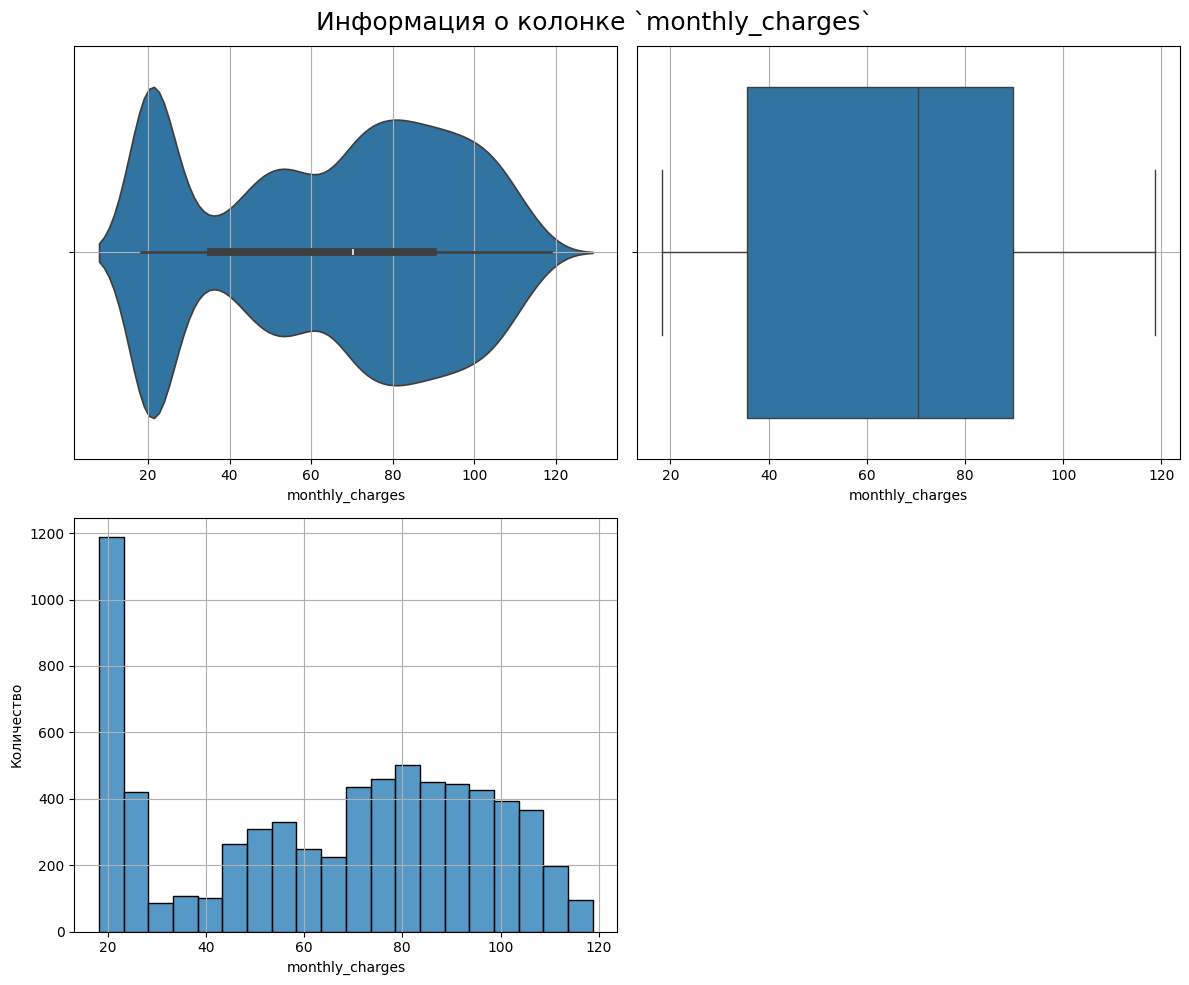

In [40]:
draw_plots_about_column(contract, 'monthly_charges')

Все значения выглядят адекватно. Нет выбросов и/или аномалий.

#### 3.6.9. <a id='toc3_6_9_'></a>Признак `total_charges`          [&#8593;](#toc0_)

In [41]:
contract['total_charges'].describe()

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

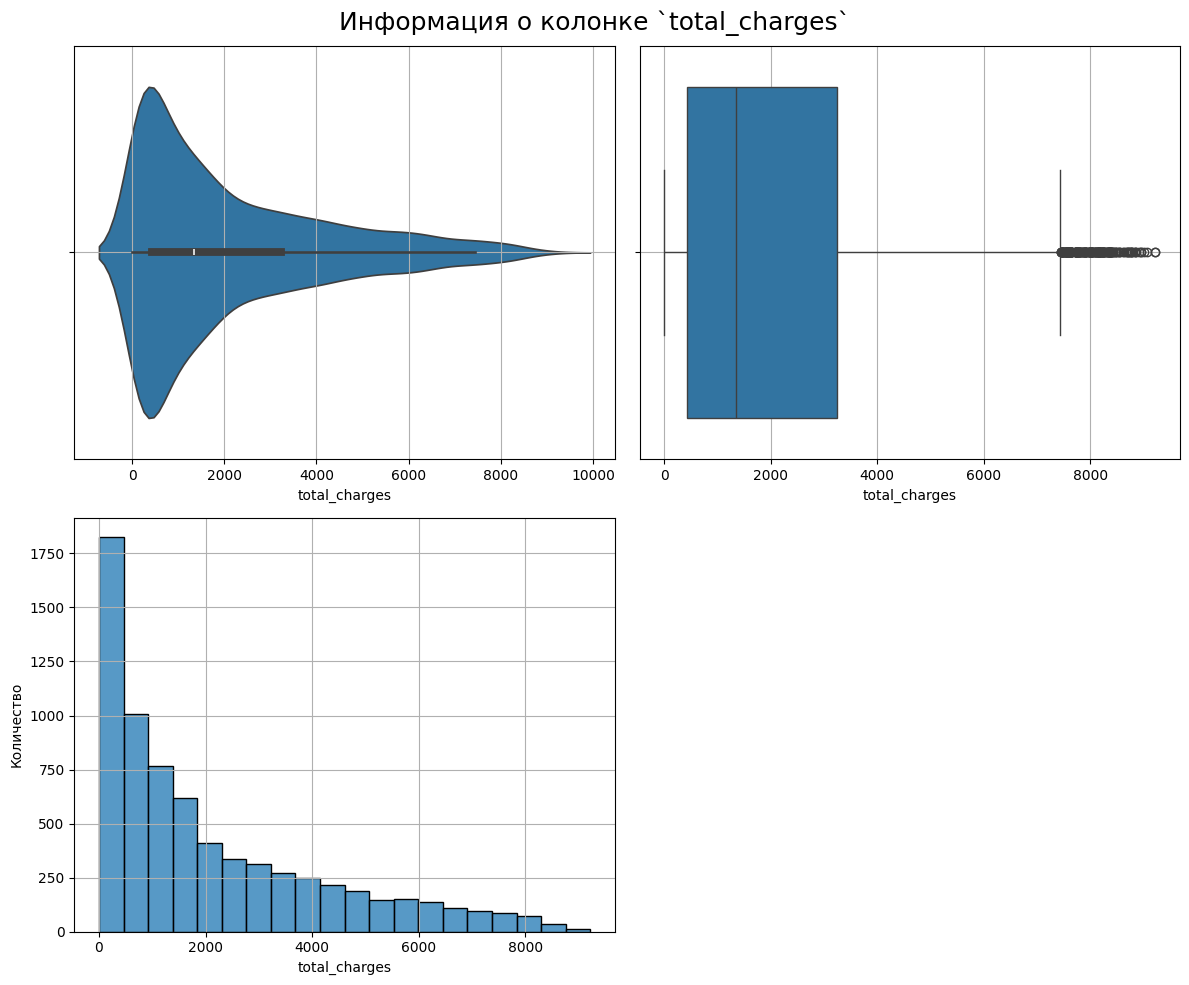

In [42]:
draw_plots_about_column(contract, 'total_charges')

В основном, суммарное значение небольшое (медиана - `1343$`). По гистограмме начала контракта, мы видели, что огромный прирост был в 2019 году, то есть прошло около года (а то и пара месяцев) с момента, когда пришло много новых клиентов. Поэтому данное распределение суммарных платежей выглядит логично.

### 3.7. <a id='toc3_7_'></a>Выводы по датасету          [&#8593;](#toc0_)

Датасет `contract` содержит информацию о договорах клиентов. Датасет не содержит полных дубликатов и пропусков. Наименования признаков изначально не соответствовали PEP8 и были приведены к snake_case.

Также были замечены следующие факты:
- Признак `customer_id` содержит уникальные значения и будет использован при объединении таблиц.
- Бóльшая часть контрактов (84%) не имеет даты конца контракта (то есть они еще действующие). А вот те, что уже закончились, были активны в среднем 2.5 года.
- Чуть больше половины (55%) пользователей предпочитает ежемесячную подписку.


## 4. <a id='toc4_'></a>Датасет `personal_new.csv`          [&#8593;](#toc0_)

### 4.1. <a id='toc4_1_'></a>Загрузка          [&#8593;](#toc0_)

In [43]:
personal = pd.read_sql('SELECT * FROM personal', con)
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


### 4.2. <a id='toc4_2_'></a>Переименование признаков          [&#8593;](#toc0_)

Видим, что названия признаков вновь не соотвествуют PEP8.

In [44]:
personal.columns = [camel_to_snake(c) for c in personal.columns]
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

### 4.3. <a id='toc4_3_'></a>Проверка типов данных          [&#8593;](#toc0_)

In [45]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


По-умолчанию все типы данных ожидаемо `object`. Что в данном случае почти совпадает с ожидаемым результатом. Произведем преобразования единственного столбца с числовым типом данных.

In [46]:
personal['senior_citizen'] = pd.to_numeric(personal['senior_citizen'])

In [47]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### 4.4. <a id='toc4_4_'></a>Проверка полных дубликатов          [&#8593;](#toc0_)

In [48]:
check_duplicates(personal)

Полных дубликатов не обнаружено.


### 4.5. <a id='toc4_5_'></a>Проверка пропусков          [&#8593;](#toc0_)

In [49]:
check_nans(personal)

Пропусков не обнаружено.


### 4.6. <a id='toc4_6_'></a>Изучение признаков          [&#8593;](#toc0_)

#### 4.6.1. <a id='toc4_6_1_'></a>Описание          [&#8593;](#toc0_)

|     Признак    | Описание                              |
|:--------------:|---------------------------------------|
| customer_id    | идентификатор пользователя            |
| gender         | пол                                   |
| senior_сitizen | является ли абонент пенсионером       |
| partner        | есть ли у абонента супруг или супруга |
| dependents     | есть ли у абонента дети               |

#### 4.6.2. <a id='toc4_6_2_'></a>Признак `customer_id`          [&#8593;](#toc0_)

In [50]:
personal['customer_id'].nunique(), len(personal)

(7043, 7043)

Все `customer_id` вновь уникальны.

#### 4.6.3. <a id='toc4_6_3_'></a>Признак `gender`          [&#8593;](#toc0_)

In [51]:
get_value_counts(personal['gender'])

,count,part
gender,,
Male,3555,0.504756
Female,3488,0.495244


Распределение почти равномерное. Для удобства сразу же переведем в числовой формат.

In [52]:
personal['gender'] = (personal['gender'] == 'Male').astype('int')

In [53]:
get_value_counts(personal['gender'])

,count,part
gender,,
1,3555,0.504756
0,3488,0.495244


Кодирование прошло успешно.

#### 4.6.4. <a id='toc4_6_4_'></a>Признак `senior_citizen`          [&#8593;](#toc0_)

In [54]:
get_value_counts(personal['senior_citizen'])

,count,part
senior_citizen,,
0,5901,0.837853
1,1142,0.162147


Признак логический и уже закодирован в числах. Видимо, что бóльшая часть клиентов (`84%`) не относится к категории пенсионеров.

#### 4.6.5. <a id='toc4_6_5_'></a>Признак `partner`          [&#8593;](#toc0_)

In [55]:
get_value_counts(personal['partner'])

,count,part
partner,,
No,3641,0.516967
Yes,3402,0.483033


Признак тоже логический, но значения представлены строками. Закодируем числами.

In [56]:
personal['partner'] = (personal['partner'] == 'Yes').astype('int')

In [57]:
get_value_counts(personal['partner'])

,count,part
partner,,
0,3641,0.516967
1,3402,0.483033


Кодирование прошло успешно.

#### 4.6.6. <a id='toc4_6_6_'></a>Признак `dependents`          [&#8593;](#toc0_)

In [58]:
get_value_counts(personal['dependents'])

,count,part
dependents,,
No,4933,0.700412
Yes,2110,0.299588


Вновь логический признак. Также закодируем значения числами.

In [59]:
personal['dependents'] = (personal['dependents'] == 'Yes').astype('int')

In [60]:
get_value_counts(personal['dependents'])

,count,part
dependents,,
0,4933,0.700412
1,2110,0.299588


Кодирование прошло успешно.

---

Проверим, что все столбцы имеют верные типы данных после преобразований.

In [61]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   int64 
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   int64 
 4   dependents      7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


*Так как все числовые признаки являются бинарными, то можно было бы сократить используемую память. Сделаем это уже после объединения датасетов в один итоговый.*

### 4.7. <a id='toc4_7_'></a>Выводы по датасету          [&#8593;](#toc0_)

Датасет `personal_new.csv` содержит информацию о клиентах. Есть уникальные `client_id`, которые будут использованы при объединении таблиц. Так же есть 4 бинарных признака, каждый из которых был преобразован к целочисленному типу данных.

Пропусков и полных дубликатов нет. Часть признаков имела имена, не соответствующие PEP8, - они были переименованы.

## 5. <a id='toc5_'></a>Датасет `internet_new.csv`          [&#8593;](#toc0_)

### 5.1. <a id='toc5_1_'></a>Загрузка          [&#8593;](#toc0_)

In [62]:
internet = pd.read_sql('SELECT * FROM internet', con)
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


### 5.2. <a id='toc5_2_'></a>Переименование признаков          [&#8593;](#toc0_)

Видим, что названия признаков вновь не соотвествуют PEP8.

In [63]:
internet.columns = [camel_to_snake(c) for c in internet.columns]
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

### 5.3. <a id='toc5_3_'></a>Проверка типов данных          [&#8593;](#toc0_)

In [64]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


В данном случае дефолтный `object` тип подошел для всех признаков.

### 5.4. <a id='toc5_4_'></a>Проверка полных дубликатов          [&#8593;](#toc0_)

In [65]:
check_duplicates(internet)

Полных дубликатов не обнаружено.


### 5.5. <a id='toc5_5_'></a>Проверка пропусков          [&#8593;](#toc0_)

In [66]:
check_nans(internet)

Пропусков не обнаружено.


### 5.6. <a id='toc5_6_'></a>Изучение признаков          [&#8593;](#toc0_)

#### 5.6.1. <a id='toc5_6_1_'></a>Описание       [&#8593;](#toc0_)

|      Параметр       | Описание                                                    |
|:-------------------:|-------------------------------------------------------------|
| customer_id         | идентификатор пользователя                                  |
| internet_service    | тип подключения                                             |
| online_security     | блокировка опасных сайтов                                   |
| online_backup       | облачное хранилище файлов для резервного копирования данных |
| device_protection   | антивирус                                                   |
| tech_support        | выделенная линия технической поддержки                      |
| streaming_tv        | стриминговое телевидение                                    |
| streaming_movies    | каталог фильмов                                             |

#### 5.6.2. <a id='toc5_6_2_'></a>Признак `customer_id`       [&#8593;](#toc0_)

In [67]:
internet['customer_id'].nunique(), len(internet)

(5517, 5517)

Вновь все `customer_id` уникальны. Но видим, что их количество отличается от первых двух датасетов.

#### 5.6.3. <a id='toc5_6_3_'></a>Признак `internet_service`       [&#8593;](#toc0_)

In [68]:
get_value_counts(internet['internet_service'])

,count,part
internet_service,,
Fiber optic,3096,0.561175
DSL,2421,0.438825


Видим всего 2 варианта. Закодируем их через OHE (если признак попадет в итоговый датафрейм).

#### 5.6.4. <a id='toc5_6_4_'></a>Все остальные признаки       [&#8593;](#toc0_)

In [69]:
cols = internet.columns.to_list()
cols.remove('customer_id')
cols.remove('internet_service')

In [70]:
for col in cols:
    print(internet[col].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


Видим, что все признаки бинарные логические. Сразу же закодируем числами.

In [71]:
for col in cols:
    internet[col] = (internet[col] == 'Yes').astype('int')

Проверим результаты.

In [72]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   int64 
 3   online_backup      5517 non-null   int64 
 4   device_protection  5517 non-null   int64 
 5   tech_support       5517 non-null   int64 
 6   streaming_tv       5517 non-null   int64 
 7   streaming_movies   5517 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 344.9+ KB


### 5.7. <a id='toc5_7_'></a>Выводы по датасету          [&#8593;](#toc0_)

Датасет содержит информацию об интернет услугах. Названия признаков, как и в предыдущих случаях, не соответствовали PEP8 и были приведены к snake_case.

Датасет не содержит полных дубликатов и пропусков.

Признак `customer_id` содержит все уникальные значения и будет использован при объединении таблиц. Однако количество id отличается от 2 предыдущих таблиц.

## 6. <a id='toc6_'></a>Датасет `phone_new.csv`          [&#8593;](#toc0_)

### 6.1. <a id='toc6_1_'></a>Загрузка          [&#8593;](#toc0_)

In [73]:
phone = pd.read_sql('SELECT * FROM phone', con)
phone.head()

,CustomerId,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### 6.2. <a id='toc6_2_'></a>Переименование признаков          [&#8593;](#toc0_)

Видим, что названия признаков вновь не соотвествуют PEP8.

In [74]:
phone.columns = [camel_to_snake(c) for c in phone.columns]
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

### 6.3. <a id='toc6_3_'></a>Проверка типов данных          [&#8593;](#toc0_)

In [75]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Вновь дефолтный тип данных подходит для таблицы.

### 6.4. <a id='toc6_4_'></a>Проверка полных дубликатов          [&#8593;](#toc0_)

In [76]:
check_duplicates(phone)

Полных дубликатов не обнаружено.


### 6.5. <a id='toc6_5_'></a>Проверка пропусков          [&#8593;](#toc0_)

In [77]:
check_nans(phone)

Пропусков не обнаружено.


### 6.6. <a id='toc6_6_'></a>Изучение признаков          [&#8593;](#toc0_)

#### 6.6.1. <a id='toc6_6_1_'></a>Описание          [&#8593;](#toc0_)

|      Параметр       | Описание                                                |
|:-------------------:|---------------------------------------------------------|
|    customer_id      | идентификатор пользователя                              |
|    multiple_lines   | подключение телефона к нескольким линиям одновременно   |

#### 6.6.2. <a id='toc6_6_2_'></a>Признак `customer_id`          [&#8593;](#toc0_)

In [78]:
phone['customer_id'].nunique(), len(phone)

(6361, 6361)

Уникальный id клиента. Будет использован при объединении таблиц.

#### 6.6.3. <a id='toc6_6_3_'></a>Признак `multiple_lines`          [&#8593;](#toc0_)

In [79]:
get_value_counts(phone['multiple_lines'])

,count,part
multiple_lines,,
No,3390,0.532935
Yes,2971,0.467065


Вновь логический признак, который представлен строковыми значениями. Закодируем.

In [80]:
phone['multiple_lines'] = (phone['multiple_lines'] == 'Yes').astype('int')

In [81]:
get_value_counts(phone['multiple_lines'])

,count,part
multiple_lines,,
0,3390,0.532935
1,2971,0.467065


### 6.7. <a id='toc6_7_'></a>Выводы по датасету          [&#8593;](#toc0_)

Крайне небольшой (по количеству признаков) датасет. Представлен всего один признак - `multiple_lines`, с информацией о том, подключен ли телефон к нескольким линиям одновременно. Изначально признак содержал текстовые значения, однако был закодирован в числа.

Датасет не содержит полных дубликатов и пропусков. Имена признаков вновь не соответствовали PEP8 и были изменены.

## 7. <a id='toc7_'></a>Объединение таблиц          [&#8593;](#toc0_)

### 7.1. <a id='toc7_1_'></a>Объединение       [&#8593;](#toc0_)

Разные датафреймы имеют разное количество записей, а значит и `customer_id`.

In [82]:
df = pd.merge(contract, personal, on='customer_id', how='outer')
df = pd.merge(df, internet, on='customer_id', how='outer')
df = pd.merge(df, phone, on='customer_id', how='outer')

In [83]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,0002-ORFBO,2019-05-01,No,One year,1,Mailed check,65.6,631.73,0,0,1,1,DSL,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0003-MKNFE,2019-05-01,No,Month-to-month,0,Mailed check,59.9,539.10,1,0,0,0,DSL,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0004-TLHLJ,2019-09-01,No,Month-to-month,1,Electronic check,73.9,406.45,1,0,0,0,Fiber optic,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0011-IGKFF,2018-12-01,No,Month-to-month,1,Electronic check,98.0,1372.00,1,1,1,0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,0013-EXCHZ,2019-09-01,No,Month-to-month,1,Mailed check,83.9,444.67,0,1,1,0,Fiber optic,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [84]:
df.shape

(7043, 20)

Видим, что результирующий размер совпал с размерами датасетов `contract` и `personal`. Следовательно в датасетах `internet` и `phone` нет информации о части абонентов, например, которые уже не пользуются услугами.

### 7.2. <a id='toc7_2_'></a>Проверка типов данных       [&#8593;](#toc0_)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   int64         
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   int64         
 11  dependents         7043 non-null   int64         
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   float64       
 14  online_b

Все типы данных верные.

### 7.3. <a id='toc7_3_'></a>Проверка полных дубликатов       [&#8593;](#toc0_)

In [86]:
check_duplicates(df)

Полных дубликатов не обнаружено.


### 7.4. <a id='toc7_4_'></a>Проверка пропусков       [&#8593;](#toc0_)

In [87]:
check_nans(df)

+-------------------+----------------------+
|      Feature      | Missing values count |
+-------------------+----------------------+
|    customer_id    |      0 (0.00%)       |
|     dependents    |      0 (0.00%)       |
|      partner      |      0 (0.00%)       |
|       gender      |      0 (0.00%)       |
|   total_charges   |      0 (0.00%)       |
|  monthly_charges  |      0 (0.00%)       |
|   senior_citizen  |      0 (0.00%)       |
| paperless_billing |      0 (0.00%)       |
|        type       |      0 (0.00%)       |
|      end_date     |      0 (0.00%)       |
|     begin_date    |      0 (0.00%)       |
|   payment_method  |      0 (0.00%)       |
|   multiple_lines  |     682 (9.68%)      |
|  streaming_movies |    1526 (21.67%)     |
|  internet_service |    1526 (21.67%)     |
|  online_security  |    1526 (21.67%)     |
|   online_backup   |    1526 (21.67%)     |
| device_protection |    1526 (21.67%)     |
|    tech_support   |    1526 (21.67%)     |
|    strea

Пропуски ожидаемы. Как было упомянуто выше, в двух датасетах нет информации о части абонентов.

## 8. <a id='toc8_'></a>Выделение таргета       [&#8593;](#toc0_)

In [88]:
target = 'leave'
df[target] = (df['end_date'] != 'No').astype('int')
df = df.drop(columns='end_date')

In [89]:
get_value_counts(df[target])

,count,part
leave,,
0,5942,0.843675
1,1101,0.156325


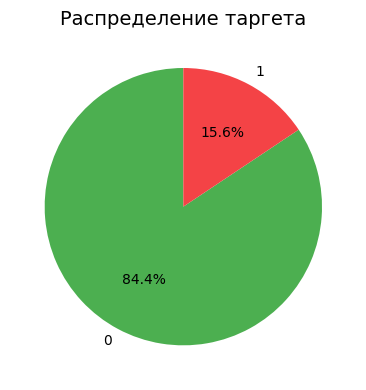

In [90]:
plt.figure(figsize=(4, 4))

value_counts = df[target].value_counts()
plt.pie(value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        colors=['#4caf50', '#f44346'],
        startangle=90)
plt.title('Распределение таргета', fontsize=14)
plt.tight_layout()
plt.show()

Наблюдаем довольно большой дизбаланс.

## 9. <a id='toc9_'></a>Корреляция      [&#8593;](#toc0_)

Признак `customer_id` был необходим при объединении таблиц и теперь может быть удален.

In [91]:
df = df.drop(columns='customer_id')
assert 'customer_id' not in df.columns

In [92]:
df.head()

,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,leave
0,2019-05-01,One year,1,Mailed check,65.6,631.73,0,0,1,1,DSL,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
1,2019-05-01,Month-to-month,0,Mailed check,59.9,539.10,1,0,0,0,DSL,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,2019-09-01,Month-to-month,1,Electronic check,73.9,406.45,1,0,0,0,Fiber optic,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2018-12-01,Month-to-month,1,Electronic check,98.0,1372.00,1,1,1,0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
4,2019-09-01,Month-to-month,1,Mailed check,83.9,444.67,0,1,1,0,Fiber optic,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


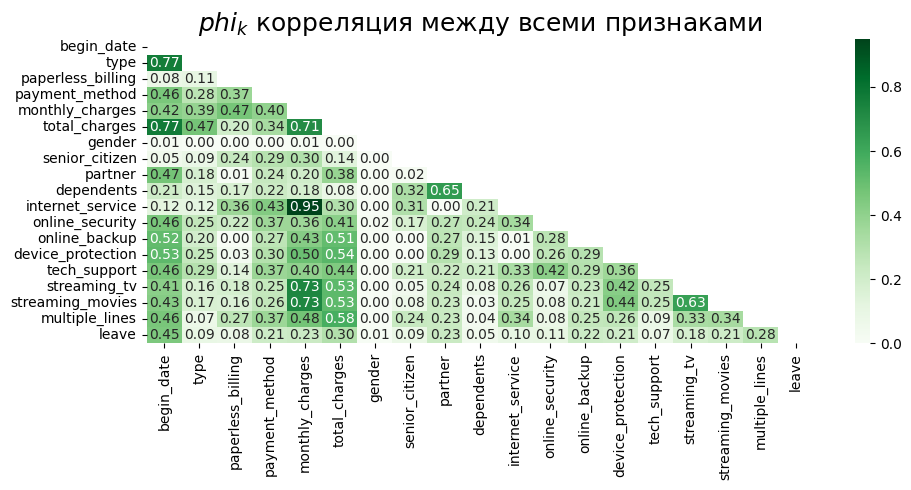

In [93]:
check_phik_correlation(df, ['monthly_charges', 'total_charges'])

Можно сделать следующие выводы:

- наблюдаем крайне сильную корреляцию между признаками `internet_service` и `monhtly_charges`. Видимо один из видов интернета дороже другого.
- `total_charges` и `begin_date` имеют сильную связь, что абсолютно логично
- целевой признак (`leave`) имеет слабую или ниже среднего корреляции со всеми признаками, кроме `begin_date`. Там наблюдается умеренная корреляция. Учтем это при генерации новых признаков.

## 10. <a id='toc10_'></a>Разделение данных       [&#8593;](#toc0_)

In [94]:
df.head()

,begin_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,leave
0,2019-05-01,One year,1,Mailed check,65.6,631.73,0,0,1,1,DSL,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
1,2019-05-01,Month-to-month,0,Mailed check,59.9,539.10,1,0,0,0,DSL,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,2019-09-01,Month-to-month,1,Electronic check,73.9,406.45,1,0,0,0,Fiber optic,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,2018-12-01,Month-to-month,1,Electronic check,98.0,1372.00,1,1,1,0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
4,2019-09-01,Month-to-month,1,Mailed check,83.9,444.67,0,1,1,0,Fiber optic,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [95]:
X = df.drop(columns=target)
y = df[target]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

In [97]:
num_cols = df.select_dtypes(include='number').columns.to_list()
num_cols.remove(target)

cat_cols = ['type', 'payment_method', 'internet_service']

## 11. <a id='toc11_'></a>Модели       [&#8593;](#toc0_)

### 11.1. <a id='toc11_1_'></a>Подготовка     [&#8593;](#toc0_)

In [98]:
class StandardScalerForImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        self.scaler = StandardScaler()
        self.num_cols = None

    def fit(self, X, y=None):
        self.num_cols = X.select_dtypes(include='number').columns
        self.scaler.fit(X[self.num_cols])
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_copy = X.copy()
        X_copy[self.num_cols] = self.scaler.transform(X_copy[self.num_cols])
        return X_copy

    def inverse_transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_copy = X.copy()
        X_copy[self.num_cols] = self.scaler.inverse_transform(X_copy[self.num_cols])
        return X_copy

In [99]:
class DateExtractor(BaseEstimator, TransformerMixin):
    def fit(self, _, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X['days_from_start'] = (pd.Timestamp('2020-02-01') - X['begin_date']).dt.days
        X['begin_date_year'] = X['begin_date'].dt.year
        X['begin_date_month'] = X['begin_date'].dt.month
        X = X.drop(columns='begin_date')

        return X

In [100]:
class FeaturesGenerator(BaseEstimator, TransformerMixin):
    service_cols = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

    def fit(self, _, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X['total_services'] = X[self.service_cols].sum(axis=1)

        return X

In [101]:
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cat_cols: list[str]):
        super().__init__()
        self.cat_cols = cat_cols
        self.ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='infrequent_if_exist')

    def fit(self, X, y=None):
        self.ohe.fit(X[self.cat_cols])
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        encoded = pd.DataFrame(self.ohe.transform(X[self.cat_cols]),
                               index=X.index,
                               columns=self.ohe.get_feature_names_out())
        return X.join(encoded).drop(columns=self.cat_cols)

In [102]:
class KNNImputerWithScaling(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbors: int = 5, threshold: float = 1e-6):
        super().__init__()
        self.n_neighbors = n_neighbors
        self.threshold = threshold
        self.scaler = StandardScalerForImputer()
        self.imputer = KNNImputer(n_neighbors=n_neighbors)

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X_scaled = self.scaler.transform(X)
        X_imputed = self.imputer.fit_transform(X_scaled)
        X_imputed = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
        X_imputed = self.scaler.inverse_transform(X_imputed)
        X_imputed = self._round_small_values(X_imputed)
        return X_imputed

    def _round_small_values(self, X: pd.DataFrame) -> pd.DataFrame:
        X_copy = X.copy()
        for col in X_copy.columns:
            X_copy[col] = np.where(np.abs(X_copy[col]) < self.threshold, 0, X_copy[col])
        return X_copy

In [103]:
preprocessor_pipeline = Pipeline([
    ('date_extractor', DateExtractor()),
    ('ohe', OneHotEncoderTransformer(cat_cols)),
    ('knn_imputer', KNNImputerWithScaling(n_neighbors=5)),
    ('features_generator', FeaturesGenerator()),
])

In [104]:
def get_objective(estimator,
                  X_train: pd.DataFrame,
                  y_train: pd.Series,
                  verbose: bool = False):
    def objective(params: dict) -> float:
        """Кросс-валидация с текущими гиперпараметрами.

        Args:
            estimator: пайплайн с моделью или отдельно модель
            params (dict): гиперпараметры
            X_train (pd.DataFrame): входные признаки (features)
            y_train (pd.Series): целевой признак (target)

        Returns:
            dict: Словарь со средним значением метрики, гиперпараметрами и статусом.
        """
        # Некоторые параметры могут быть только целочисленные, приводим их к нужному типу
        for key, value in params.items():
            if isinstance(value, float) and value % 1 == 0:
                params[key] = int(value)

        estimator.set_params(**params)
        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
        try:
            score = cross_val_score(estimator=estimator,
                                    X=X_train,
                                    y=y_train,
                                    scoring='roc_auc',
                                    cv=skf,
                                    n_jobs=-1)

            return {
                'loss': -score.mean(),
                'params': params,
                'status': STATUS_OK
            }
        except Exception as e:
            if verbose:
                print(e)
            return {'status': STATUS_FAIL}

    return objective

In [105]:
def get_model_results(estimator,
                      param_space: dict,
                      X_train: pd.DataFrame,
                      y_train: pd.Series,
                      max_evals: int = 100,
                      verbose: bool = False
                      ) -> tuple[dict, float]:
    objective = get_objective(estimator, X_train, y_train, verbose)
    trials = Trials()

    fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        trials=trials,
        rstate=np.random.default_rng(RANDOM_STATE),
        show_progressbar=True
    )

    clear_output()

    best_params = trials.best_trial['result']['params']
    best_score = abs(trials.best_trial['result']['loss'])
    print(f'Finish with best ROC-AUC = {best_score:.4f}')

    return best_params, best_score

### 11.2. <a id='toc11_2_'></a>Модель `LogisticRegression`     [&#8593;](#toc0_)

In [106]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1))
])

In [107]:
param_space = {
    'preprocessor__knn_imputer__n_neighbors': hp.choice('preprocessor__knn_imputer__n_neighbors', range(2, 6)),

    'scaler': hp.choice('scaler', [StandardScaler(), 'passthrough']),

    'model__C':                 hp.loguniform('model__C', -4, 4),                      # Регуляризация: обратная сила регуляризации (меньше значение -> сильнее регуляризация)
    'model__penalty':           hp.choice('model__penalty', ['l1', 'l2']),             # Тип регуляризации: L1 или L2
    'model__solver':            hp.choice('model__solver', ['liblinear']),             # Алгоритм оптимизации: liblinear подходит для L1 и L2
    'model__max_iter':          hp.quniform('model__max_iter', 50, 300, 1),            # Максимальное количество итераций для сходимости
    'model__class_weight':      hp.choice('model__class_weight', [None, 'balanced']),  # Веса классов: None или 'balanced' для учета дисбаланса классов
    'model__fit_intercept':     hp.choice('model__fit_intercept', [True, False]),      # Добавлять ли intercept (смещение) в модель
    'model__intercept_scaling': hp.uniform('model__intercept_scaling', 0.1, 10.0),     # Масштабирование intercept (актуально при penalty='l2')
}

In [108]:
# best_params_lr, best_score_lr = get_model_results(lr_pipeline, param_space, X_train, y_train)

In [109]:
best_params_lr = {
    'model__C': 0.018939565089012973,
    'model__class_weight': 'balanced',
    'model__fit_intercept': False,
    'model__intercept_scaling': 2.4897185867814637,
    'model__max_iter': 254,
    'model__penalty': 'l2',
    'model__solver': 'liblinear',
    'preprocessor__knn_imputer__n_neighbors': 3,
    'scaler': 'passthrough'
}

In [110]:
best_score_lr = 0.9251165031494443

### 11.3. <a id='toc11_3_'></a>Модель `LinearSVC`     [&#8593;](#toc0_)

In [111]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('scaler', StandardScaler()),
    ('model', LinearSVC(random_state=RANDOM_STATE))
])

In [112]:
param_space = {
    'preprocessor__knn_imputer__n_neighbors': hp.choice('preprocessor__knn_imputer__n_neighbors', range(2, 6)),

    'scaler': hp.choice('scaler', [StandardScaler(), 'passthrough']),

    'model__C':                 hp.loguniform('C', -5, 2),                      # Регуляризация, логарифмический масштаб
    'model__loss':              hp.choice('loss', ['hinge', 'squared_hinge']),  # Функция потерь
    'model__penalty':           hp.choice('penalty', ['l2', 'l1']),             # Тип регуляризации
    'model__dual':              hp.choice('dual', [True, False]),               # Двойственная или прямая задача
    'model__tol':               hp.loguniform('tol', -10, -1),                  # Точность остановки
    'model__max_iter':          hp.quniform('max_iter', 100, 2000, 100),        # Максимальное количество итераций
    'model__intercept_scaling': hp.uniform('intercept_scaling', 0.1, 10.0),     # Масштабирование свободного члена
    'model__class_weight':      hp.choice('class_weight', [None, 'balanced']),  # Веса классов
}

In [113]:
# best_params_svc, best_score_svc = get_model_results(svc_pipeline, param_space, X_train, y_train, 400)

In [114]:
best_params_svc = {
    'model__C': 0.008747856856076873,
    'model__class_weight': 'balanced',
    'model__dual': False,
    'model__intercept_scaling': 3.1077200979780333,
    'model__loss': 'squared_hinge',
    'model__max_iter': 300,
    'model__penalty': 'l1',
    'model__tol': 0.0009997365493265033,
    'preprocessor__knn_imputer__n_neighbors': 2,
    'scaler': 'passthrough'
}

In [115]:
best_score_svc = 0.9255118162769999

### 11.4. <a id='toc11_4_'></a>Модель `RandomForestClassifier`     [&#8593;](#toc0_)

In [116]:
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('model', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1))
])

In [117]:
param_space = {
    'preprocessor__knn_imputer__n_neighbors': hp.choice('preprocessor__knn_imputer__n_neighbors', range(2, 6)),

    'model__n_estimators':       hp.choice('model__n_estimators', [50, 100, 200, 500]),      # Количество деревьев в лесу
    'model__criterion':          hp.choice('model__criterion', ['gini', 'entropy']),         # Критерий качества разбиения
    'model__max_depth':          hp.choice('model__max_depth', [None, 10, 20, 30, 50]),      # Максимальная глубина дерева
    'model__min_samples_split':  hp.choice('model__min_samples_split', [2, 5, 10]),          # Минимальное число объектов для разбиения
    'model__min_samples_leaf':   hp.choice('model__min_samples_leaf', [1, 2, 4]),            # Минимальное число объектов в листе
    'model__bootstrap':          hp.choice('model__bootstrap', [True, False]),               # Использовать бутстрэп выборки
    'model__class_weight':       hp.choice('model__class_weight', [None, 'balanced']),       # Веса классов для несбалансированных данных
}

In [118]:
# best_params_rfc, best_score_rfc = get_model_results(rfc_pipeline, param_space, X_train, y_train)

In [119]:
best_params_rfc = {
    'model__bootstrap': True,
    'model__class_weight': 'balanced',
    'model__criterion': 'gini',
    'model__max_depth': None,
    'model__min_samples_leaf': 1,
    'model__min_samples_split': 2,
    'model__n_estimators': 500,
    'preprocessor__knn_imputer__n_neighbors': 5
}

In [120]:
best_score_rfc = 0.9352877271353951

### 11.5. <a id='toc11_5_'></a>Модель `LGBMClassifier`     [&#8593;](#toc0_)

In [121]:
lgbmc_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('model', LGBMClassifier(random_state=RANDOM_STATE, n_jobs=-1, verbose=-1))
])

In [122]:
param_space = {
    'preprocessor__knn_imputer__n_neighbors': hp.choice('preprocessor__knn_imputer__n_neighbors', range(2, 6)),

    'model__boosting_type':      hp.choice('model__boosting_type', ['gbdt', 'dart', 'goss']),    # Тип бустинга
    'model__num_leaves':         hp.quniform('model__num_leaves', 10, 200, 1),                   # Количество листьев в дереве
    'model__learning_rate':      hp.loguniform('model__learning_rate', -5, 0),                   # Скорость обучения
    'model__n_estimators':       hp.quniform('model__n_estimators', 50, 500, 1),                 # Количество деревьев
    'model__subsample':          hp.uniform('model__subsample', 0.5, 1.0),                       # Доля выборки для обучения каждого дерева
    'model__colsample_bytree':   hp.uniform('model__colsample_bytree', 0.5, 1.0),                # Доля признаков для каждого дерева
    'model__reg_alpha':          hp.loguniform('model__reg_alpha', -5, 2),                       # L1-регуляризация
    'model__reg_lambda':         hp.loguniform('model__reg_lambda', -5, 2),                      # L2-регуляризация
    'model__min_child_samples':  hp.quniform('model__min_child_samples', 5, 100, 1),             # Минимальное количество объектов в листе
    'model__max_depth':          hp.choice('model__max_depth', [-1, 3, 5, 7, 10]),               # Максимальная глубина дерева (-1 = без ограничений)
}

In [123]:
# best_params_lgmbc, best_score_lgbmc = get_model_results(lgbmc_pipeline, param_space, X_train, y_train, 300)

In [124]:
best_params_lgmbc = {
    'model__boosting_type': 'goss',
    'model__colsample_bytree': 0.9668542140515629,
    'model__learning_rate': 0.07816997644589749,
    'model__max_depth': 3,
    'model__min_child_samples': 30,
    'model__n_estimators': 467,
    'model__num_leaves': 199,
    'model__reg_alpha': 0.12929869799008747,
    'model__reg_lambda': 4.215664623430443,
    'model__subsample': 0.7178899681887658,
    'preprocessor__knn_imputer__n_neighbors': 2
}

In [125]:
best_score_lgbmc = 0.96671046359667

### 11.6. <a id='toc11_6_'></a>Модель `CatBoostClassifier`     [&#8593;](#toc0_)

In [126]:
cbc_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('model', CatBoostClassifier(random_state=RANDOM_STATE, thread_count=-1, silent=True))
])

In [127]:
param_space = {
    'model__iterations':                 hp.choice('model__iterations', [100, 200, 500]),                              # Количество деревьев
    'model__learning_rate':              hp.uniform('model__learning_rate', 0.01, 0.3),                                # Скорость обучения
    'model__depth':                      hp.choice('model__depth', [4, 6, 8, 10]),                                     # Глубина деревьев
    'model__l2_leaf_reg':                hp.uniform('model__l2_leaf_reg', 1, 10),                                      # Коэффициент L2-регуляризации
    'model__border_count':               hp.choice('model__border_count', [32, 64, 128, 254]),                         # Количество границ для разделения
    'model__random_strength':            hp.uniform('model__random_strength', 0.1, 2.0),                               # Сила случайности при выборе разделений
    'model__bagging_temperature':        hp.uniform('model__bagging_temperature', 0.0, 1.0),                           # Температура бэггинга
    'model__leaf_estimation_iterations': hp.choice('model__leaf_estimation_iterations', [1, 5, 10]),                   # Количество итераций для оценки листьев
    'model__grow_policy':                hp.choice('model__grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']), # Стратегия роста деревьев
    'model__min_data_in_leaf':           hp.choice('model__min_data_in_leaf', [1, 5, 10]),                             # Минимальное количество объектов в листе
    'model__max_leaves':                 hp.choice('model__max_leaves', [31, 63, 127]),                                # Максимальное количество листьев
}

In [128]:
# best_params_cbc, best_score_cbc = get_model_results(cbc_pipeline, param_space, X_train, y_train, 300)

In [129]:
best_params_cbc = {
    'model__bagging_temperature': 0.46352758812343664,
    'model__border_count': 254,
    'model__depth': 4,
    'model__grow_policy': 'Lossguide',
    'model__iterations': 200,
    'model__l2_leaf_reg': 8.211456629856578,
    'model__leaf_estimation_iterations': 1,
    'model__learning_rate': 0.2936890186807534,
    'model__max_leaves': 31,
    'model__min_data_in_leaf': 10,
    'model__random_strength': 1.6815680039053795
}

In [130]:
best_score_cbc = 0.9649851305496516

### 11.7. <a id='toc11_7_'></a>Нейронная сеть [&#8593;](#toc0_)

In [131]:
class TabularDS(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [132]:
class MLP(nn.Module):
    def __init__(self, inp, h=(128, 64), drop=0.2):
        super().__init__()
        layers, prev = [], inp
        for k in h:
            layers += [nn.Linear(prev, k),
                        nn.ReLU(),
                        nn.Dropout(drop)]
            prev = k
        layers.append(nn.Linear(prev, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x).squeeze(1)

In [133]:
def run_epoch(model, loader, crit, opt=None):
    model.train(opt is not None)
    losses, preds, targs = [], [], []
    for Xb, yb in loader:
        out = model(Xb)
        loss = crit(out, yb)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        losses.append(loss.item() * len(yb))
        preds.append(torch.sigmoid(out).detach())
        targs.append(yb)
    preds = torch.cat(preds)
    targs = torch.cat(targs)

    return sum(losses) / len(loader.dataset), roc_auc_score(targs, preds)


In [134]:
X_train_np = preprocessor_pipeline.fit_transform(X_train).to_numpy(dtype=np.float32)
y_train_np = y_train.to_numpy(dtype=np.float32)

In [135]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_np,
                                            y_train_np,
                                            test_size=0.2,
                                            stratify=y_train_np,
                                            random_state=RANDOM_STATE)

In [136]:
pos_w = torch.tensor([(y_tr == 0).sum() / (y_tr == 1).sum()], dtype=torch.float32)
crit  = nn.BCEWithLogitsLoss(pos_weight=pos_w)

In [137]:
tr_loader = DataLoader(TabularDS(X_tr, y_tr), batch_size=64, shuffle=True)
val_loader= DataLoader(TabularDS(X_val, y_val), batch_size=64)

In [138]:
model = MLP(X_tr.shape[1])
opt = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [139]:
EPOCHS = 30

In [140]:
best_score_nn = 0
for epoch in range(1, EPOCHS + 1):
    tl, ta = run_epoch(model, tr_loader, crit, opt)
    vl, va = run_epoch(model, val_loader, crit)
    print(f'Epoch [{epoch:02d}/{EPOCHS}]  train {ta:.4f} | val {va:.4f}')
    if va > best_score_nn:
        best_score_nn = va
print('Best ROC‑AUC:', best_score_nn)

Epoch [01/30]  train 0.6801 | val 0.8283
Epoch [02/30]  train 0.7072 | val 0.6801
Epoch [03/30]  train 0.7284 | val 0.8396
Epoch [04/30]  train 0.7653 | val 0.8511
Epoch [05/30]  train 0.8016 | val 0.8498
Epoch [06/30]  train 0.8107 | val 0.8607
Epoch [07/30]  train 0.8240 | val 0.8600
Epoch [08/30]  train 0.8100 | val 0.8588
Epoch [09/30]  train 0.8209 | val 0.8615
Epoch [10/30]  train 0.8336 | val 0.8651
Epoch [11/30]  train 0.8327 | val 0.8659
Epoch [12/30]  train 0.8291 | val 0.8646
Epoch [13/30]  train 0.8359 | val 0.8757
Epoch [14/30]  train 0.8291 | val 0.8687
Epoch [15/30]  train 0.8456 | val 0.8725
Epoch [16/30]  train 0.8403 | val 0.8751
Epoch [17/30]  train 0.8502 | val 0.8791
Epoch [18/30]  train 0.8477 | val 0.8777
Epoch [19/30]  train 0.8575 | val 0.8816
Epoch [20/30]  train 0.8410 | val 0.8843
Epoch [21/30]  train 0.8600 | val 0.8886
Epoch [22/30]  train 0.8569 | val 0.8876
Epoch [23/30]  train 0.8416 | val 0.8854
Epoch [24/30]  train 0.8569 | val 0.8902
Epoch [25/30]  t

## 12. <a id='toc12_'></a>Результаты      [&#8593;](#toc0_)

### 12.1. <a id='toc12_1_'></a>Результаты на трейне      [&#8593;](#toc0_)

In [141]:
pd.options.display.float_format = '{:.4f}'.format

pd.DataFrame(
    data=[best_score_rfc, best_score_cbc, best_score_lgbmc, best_score_lr, best_score_svc, best_score_nn],
    index=['RandomForestClassifier', 'CatBoostClassifier', 'LGBMClassifier', 'LogisticRegression', 'LinearSVC', 'NN'],
    columns=['roc_auc']
).sort_values('roc_auc', ascending=True)

,roc_auc
NN,0.9015
LogisticRegression,0.9251
LinearSVC,0.9255
RandomForestClassifier,0.9353
CatBoostClassifier,0.9650
LGBMClassifier,0.9667


При обучении на кросс-валидации все модели показали неплохой результат. Лучше всего оказались `CatBoostClassifier` и `LGBMClassifier`, где последняя выиграла с небольшим отрывом. Именно ее и проверим на тестовой выборке.

### 12.2. <a id='toc12_2_'></a>Результаты на тесте      [&#8593;](#toc0_)

In [142]:
lgbmc_pipeline.set_params(**best_params_lgmbc)
lgbmc_pipeline.fit(X_train, y_train);

In [143]:
y_pred = lgbmc_pipeline.predict(X_test)

In [144]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f' ROC-AUC on test = {roc_auc:.4f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test = {accuracy:.4f}')

recall = recall_score(y_test, y_pred)
print(f'  Recall on test = {recall:.4f}')

 ROC-AUC on test = 0.8909
Accuracy on test = 0.9659
  Recall on test = 0.7818


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1486
           1       1.00      0.78      0.88       275

    accuracy                           0.97      1761
   macro avg       0.98      0.89      0.93      1761
weighted avg       0.97      0.97      0.96      1761



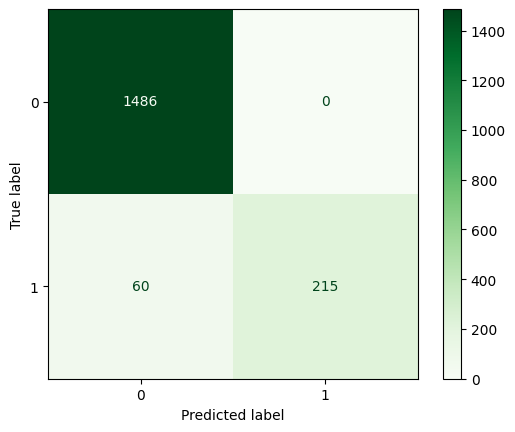

In [146]:
ConfusionMatrixDisplay.from_predictions (y_test, y_pred, cmap='Greens');

Метрика на тестовой выборке несколько хуже, чем при обучении, что говорит о возможном переобучении.

### 12.3. <a id='toc12_3_'></a>Важность признаков      [&#8593;](#toc0_)

In [147]:
best_model = lgbmc_pipeline.named_steps['model']

In [148]:
X_test_transformed = lgbmc_pipeline.named_steps['preprocessor'].transform(X_test)

/Users/rivel/anaconda3/envs/true12/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


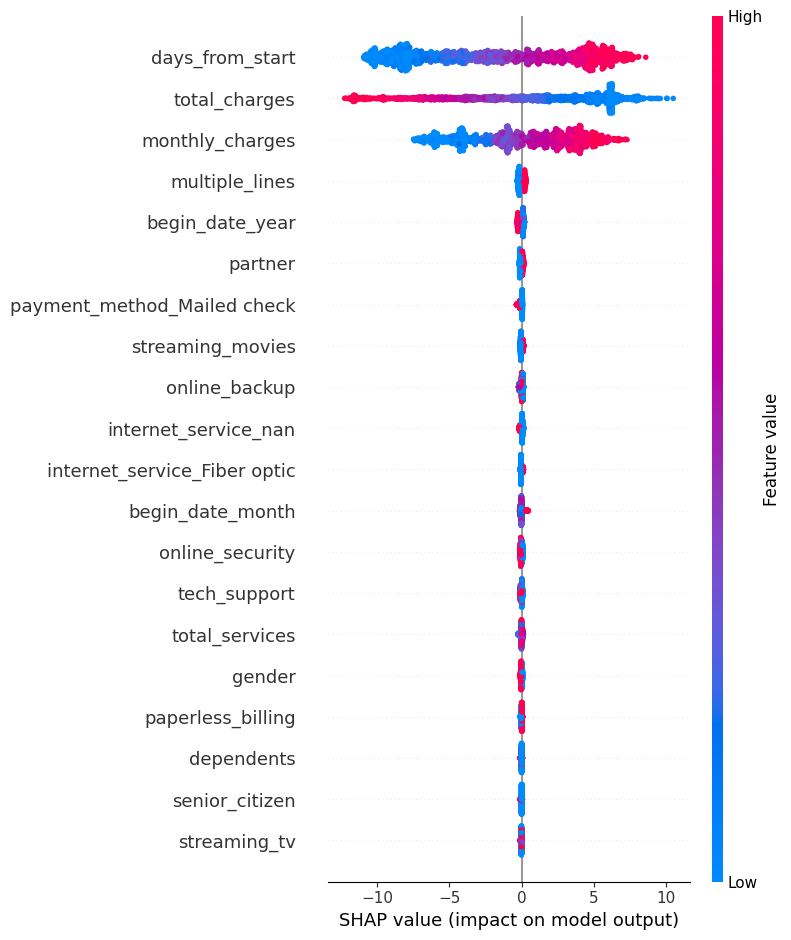

In [149]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed)

Слева представлен класс `0`, то есть, что клиент НЕ уйдет.

Анализ важности признаков помогает сделать следующие выводы:
- Чем дольше клиент пользуется услугами компании, тем больше шанс, что он уйдет. Видимо клиенты ищут новые предложения.
- Чем больше клиент платит каждый месяц, тем больше шанс, что он уйдет. Это выглядит довольно логично, люди ищут более выгодные условия.
- При этом чем больше клиент заплатил в сумме, тем меньше шанс, что он уйдет, что выглядит несколько парадоксально
- Все остальные признаки практически не имеют влияния на таргет.

## 13. <a id='toc13_'></a>Итоговый вывод          [&#8593;](#toc0_)

В финальном проекте нам было дано 4 таблицы с информацией о клиентах:
- `contract` — информация о договоре;
- `personal` — персональные данные клиента;
- `internet` — информация об интернет-услугах;
- `phone` — информация об услугах телефонии.

Первые два содержат информацию о всех клиентах выборки, а в 3 и 4 отсутствуют данные о части абонентов: `9.68%` и `21.67%` соответственно. В остальном датасеты не имеют пропусков и полных дубликатов. Имена признаков во всех датасетах не соотвествовали PEP8 и были приведены к *camel_case*. Все данные выглядят адекватно - выбросы и аномалии отсутствуют.

Далее все датасеты были объединены в один по `customer_id`. Получившийся датасет содержит информацию обо всех клиентах выборке (как в первых двух датасетах). Если данных не было - там стоит значение NaN. Позже пропуски были заполнены в пайплайне через `KNNImputer`. Полные дубликаты отсутствуют.

Далее был выделен таргет. Наблюдается довольно серьезный дизбаланс (`≈ 85/15`) в пользу класса `0` (клиент НЕ уйдет).

Были протестированы 6 различных моделей: `LogisticRegression`, `LinearSVC`, `RandomForestClassifier`, `LGBMClassifier`, `CatBoostClassifier` и полносвязная нейронная сеть. Все они показали неплохой результат. Две последние справились лучше всего, и `LGBMClassifier` победил с небольшим отрывом. Именно он был протестирован на тестовой выборке и показал следующие результаты:\
ROC-AUC = 0.8909\
Accuracy = 0.9659\
Recall = 0.7818

Модель показала довольно неплохие результаты. В будущем еще можно поработать над переобучением и над повышением метрики *recall*, так как она является очень важной в данной задаче.

Анализ важности признаков помогает сделать следующие выводы:
- Чем дольше клиент пользуется услугами компании, тем больше шанс, что он уйдет. Видимо клиенты ищут новые предложения.
- Чем больше клиент платит каждый месяц, тем больше шанс, что он уйдет. Это выглядит довольно логично, люди ищут более выгодные условия.
- При этом чем больше клиент заплатил в сумме, тем меньше шанс, что он уйдет, что выглядит несколько парадоксально
- Все остальные признаки практически не имеют влияния на таргет.

Целевая метрика (`ROC_AUC >= 0.85`) была достигнута, следовательно проект можно считать успешным.

<div class='alert alert-info'>
Я написал обычный вывод, а не как ты намекнул в сообщении что без терминов, лаконично и так далее. Надеюсь, это не критично.
</div>